## Algoritmo 1: K-Means
El algoritmo K-Means es uno de los métodos de agrupación más populares. Agrupa los datos en K grupos distintos basándose en la distancia entre los puntos de datos.

### Paso 1: Importar bibliotecas y conjuntos de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cluster import KMeans

### Paso 2: Cargar el el dataset

In [ ]:
# Cargar el dataset iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Paso 3: Normalización de datos
Es importante normalizar los datos antes de aplicar K-Means para evitar que las variables con rangos más grandes dominen el cálculo de distancias.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
normalized_iris = scaler.fit_transform(iris_df)
normalized_iris_df = pd.DataFrame(normalized_iris, columns=iris.feature_names)

In [ ]:
normalized_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Paso 4: Selección de la cantidad óptima de grupos utilizando el método del codo
El método del codo es una técnica común para seleccionar la cantidad óptima de grupos en K-Means. Consiste en ejecutar K-Means con diferentes valores de k y calcular la suma de los errores cuadrados dentro de cada grupo. El valor de k que produce un cambio significativo en la suma de errores cuadrados puede considerarse como la cantidad óptima de grupos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

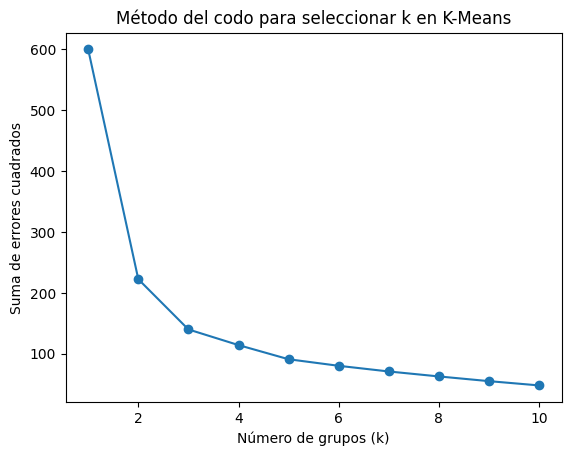

In [ ]:
# Calcular la suma de errores cuadrados para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_iris_df)
    sse.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 11), sse, 'o-')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Suma de errores cuadrados')
plt.title('Método del codo para seleccionar k en K-Means')
plt.show()

###Paso 5: Aplicar K-Means con la cantidad óptima de grupos
Una vez que hayamos seleccionado la cantidad óptima de grupos, podemos aplicar K-Means con ese valor y visualizar los resultados.

In [ ]:
# Aplicar K-Means con la cantidad óptima de grupos (ejemplo con k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_iris_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans.labels_

In [ ]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
# Obtener las etiquetas de los grupos y asignarlas a los datos
labels = kmeans.labels_
normalized_iris_df['Cluster'] = labels

In [ ]:
normalized_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


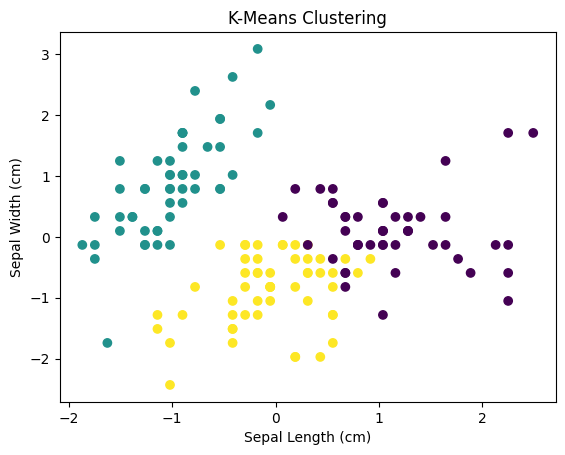

In [ ]:
# Visualizar los resultados
plt.scatter(normalized_iris_df['sepal length (cm)'], normalized_iris_df['sepal width (cm)'],
            c=normalized_iris_df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.show()

## Algoritmo 2: Agglomerative Clustering
El algoritmo Agglomerative Clustering es un enfoque jerárquico en el que los grupos se forman fusionando grupos más pequeños.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cluster import AgglomerativeClustering

### Paso 2: Cargar el el dataset

In [ ]:
# Cargar el dataset iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Paso 3: Normalización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
normalized_iris = scaler.fit_transform(iris_df)
normalized_iris_df = pd.DataFrame(normalized_iris, columns=iris.feature_names)

### Paso 4: Selección de la cantidad óptima de grupos utilizando el dendrograma
En Agglomerative Clustering, podemos utilizar el dendrograma para seleccionar la cantidad óptima de grupos. Un dendrograma muestra la jerarquía de agrupaciones y la distancia entre ellas. La cantidad óptima de grupos se puede seleccionar observando las fusiones que resultan en grandes distancias.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Realizar el clustering jerárquico
Z = linkage(normalized_iris_df, method='ward')

# Otros metodos de enlace son: complete, single, average, centroid.

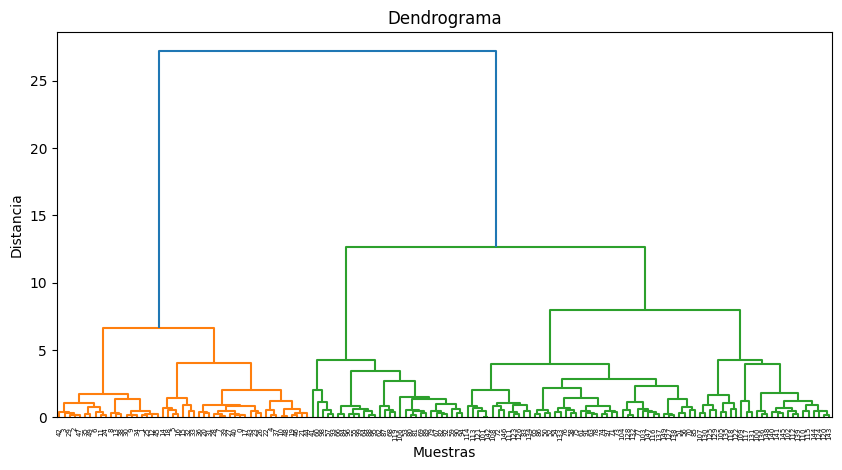

In [ ]:
# Graficar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

### Paso 5: Aplicar Agglomerative Clustering con la cantidad óptima de grupos
Una vez que hayamos seleccionado la cantidad óptima de grupos, podemos aplicar Agglomerative Clustering con ese valor y visualizar los resultados.

In [ ]:
# Aplicar Agglomerative Clustering con la cantidad óptima de grupos (ejemplo con n_clusters=3)
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(normalized_iris_df)

AgglomerativeClustering(n_clusters=3)

In [ ]:
# Obtener las etiquetas de los grupos y asignarlas a los datos
labels = agg_clustering.labels_
normalized_iris_df['Cluster'] = labels

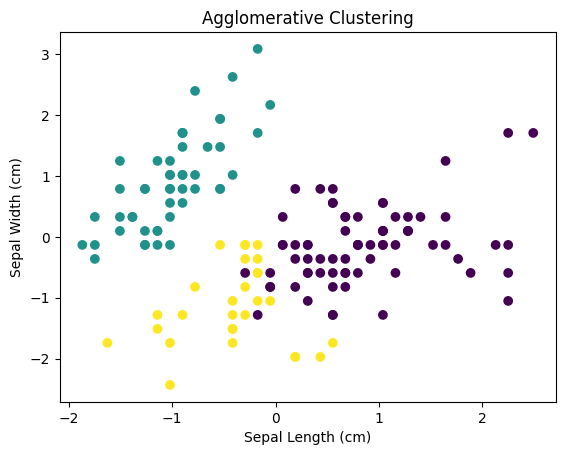

In [ ]:
# Visualizar los resultados
plt.scatter(normalized_iris_df['sepal length (cm)'], normalized_iris_df['sepal width (cm)'],
            c=normalized_iris_df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Agglomerative Clustering')
plt.show()

## Algoritmo 3: DBSCAN
DBSCAN es un algoritmo de agrupación basado en densidad que puede encontrar grupos de forma arbitraria.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cluster import DBSCAN

### Paso 2: Cargar el el dataset

In [ ]:
# Cargar el dataset iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Paso 3: Normalización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
normalized_iris = scaler.fit_transform(iris_df)
normalized_iris_df = pd.DataFrame(normalized_iris, columns=iris.feature_names)

### Paso 4: Aplicar DBSCAN y visualizar los resultados

In [ ]:
# Aplicar DBSCAN
dbscan = DBSCAN()#eps=0.3, min_samples=15)
dbscan.fit(normalized_iris_df)

DBSCAN()

In [ ]:
# Obtener las etiquetas de los grupos y asignarlas a los datos
labels = dbscan.labels_
normalized_iris_df['Cluster'] = labels

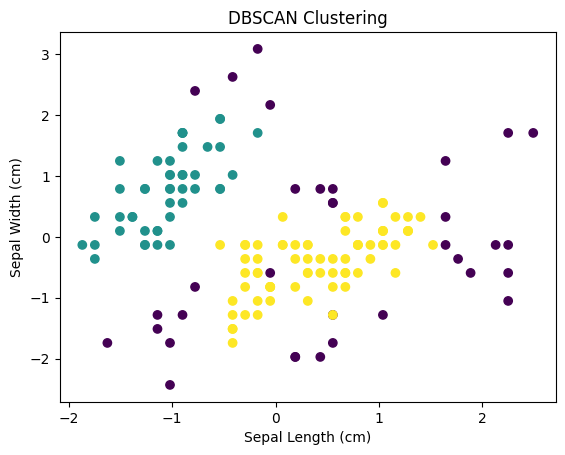

In [ ]:
# Visualizar los resultados
plt.scatter(normalized_iris_df['sepal length (cm)'], normalized_iris_df['sepal width (cm)'],
            c=normalized_iris_df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('DBSCAN Clustering')
plt.show()